# This project was made for IBM course on data science.

# Were you will be, my coffee shop?

### Here we will find a suitable place for our business coffee shop.

-------------------------------------------------------------------------------------------------------------------------------

## 1 - Introduction

Toronto is a large city and therefore it has business activity. Accordingly, it would be good to give people the opportunity to discuss business over a cup of coffee at our coffee shop. 

## 2 - Data 

We will use the data from Wikipedia about Toronto's districts, find the coordinates to them, and use the Foursquare requests to get data about these places.
And then we'll work with them with clustering, and choose the best place!

## 3 - Methodology 

I will use the K-means clustering method, and I will configure it using the Elbow method to select the best number of clusters. Then I'll look at what features the clusters have and compare them.

-------------------------------------------------------------------------------------------------------------------------------

In [67]:
import pandas as pd # library for data manipulation.

import requests # library to handle requests

from sklearn.cluster import KMeans

from sklearn import metrics

from scipy.spatial.distance import cdist

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

#!conda install -c districtdatalabs yellowbrick

!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

import matplotlib.cm as cm

import matplotlib.colors as colors

import folium # map rendering library

# Let's take a look at library version.
print(pd.__version__) 

# The pandas can take tabels straight from web site!
df = pd.read_html("http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M") 

# Let's take a look at type of our DataFrame.
print(type(df))

1.0.1
<class 'list'>


In [68]:
df

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                           Neighborhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

In [69]:
# Why our DataFrame is a list? 
# Where is pretty looking form?
# Oh, it is the list with all tables from web site!
# Let's get first table.
df = df[0]
df

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Postal Code   180 non-null    object
 1   Borough       180 non-null    object
 2   Neighborhood  180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [71]:
# I do not want to have some 'Not assigned' items.
# Let's do some filtration.
filt_Not_assigned = (df['Borough'] != 'Not assigned')
df = df.loc[filt_Not_assigned]
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [72]:
df.shape

(103, 3)

In [73]:
# Let's see what information is in Geospatial_Coordinates.csv
coordinates = pd.read_csv("Geospatial_Coordinates.csv")
coordinates

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [74]:
# Now we can merge df columns with "Latitude	Longitude" columns from coordinates.
df_with_coordinates = pd.merge(df,coordinates, on = 'Postal Code')
df_with_coordinates

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [75]:
!conda install -c conda-forge geopy --yes

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.



In [76]:
address = 'Toronto, TO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [77]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_with_coordinates['Latitude'], df_with_coordinates['Longitude'], df_with_coordinates['Borough'], df_with_coordinates['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [78]:
CLIENT_ID = 'HS5YBAFJX0VF5QHGIE3OUK4KX20GU0N42TZI4QUL0ATYYHA5' 
CLIENT_SECRET = 'KVT3ELX2FHJBO0E0AK5SONFBAXRKAHVTKWBNAFZIL5D25OIZ'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HS5YBAFJX0VF5QHGIE3OUK4KX20GU0N42TZI4QUL0ATYYHA5
CLIENT_SECRET:KVT3ELX2FHJBO0E0AK5SONFBAXRKAHVTKWBNAFZIL5D25OIZ


In [79]:
# Get the neighborhood's name.
df_with_coordinates.loc[0, 'Neighborhood']

'Parkwoods'

In [80]:
#Get the neighborhood's latitude and longitude values.
neighborhood_latitude = df_with_coordinates.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_with_coordinates.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_with_coordinates.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [81]:
#Now, let's get the top 100 venues that are in Parkwoods within a radius of 500 meters.
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT) 

In [82]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eea4215c6fd9436f69acb2a'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [83]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [84]:
#Now let's clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [85]:
#How many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [86]:
#Let's create a function to repeat the same process to all the neighborhoods.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [87]:
toronto_venues = getNearbyVenues(names=df_with_coordinates['Neighborhood'],
                                   latitudes=df_with_coordinates['Latitude'],
                                   longitudes=df_with_coordinates['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [88]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [89]:
toronto_venues.groupby('Neighborhood').count() # Let's check how many venues are per neighborhood.

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale West",7,7,7,7,7,7
Woburn,3,3,3,3,3,3
Woodbine Heights,9,9,9,9,9,9


In [90]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique()))) # number of unique categories

There are 275 unique categories.


In [91]:
print("The venue categories are", toronto_venues['Venue Category'].unique())

The venue categories are ['Park' 'Food & Drink Shop' 'Hockey Arena' 'Portuguese Restaurant'
 'Coffee Shop' 'French Restaurant' 'Intersection' 'Bakery'
 'Distribution Center' 'Spa' 'Pub' 'Restaurant' 'Breakfast Spot'
 'Gym / Fitness Center' 'Historic Site' 'Farmers Market'
 'Performing Arts Venue' 'Chocolate Shop' 'Dessert Shop' 'Café'
 'Yoga Studio' 'Theater' 'Shoe Store' 'Event Space' 'Ice Cream Shop'
 'Art Gallery' 'Cosmetics Shop' 'Electronics Store' 'Bank' 'Beer Store'
 'Hotel' 'Health Food Store' 'Antique Shop' 'Boutique'
 'Furniture / Home Store' 'Vietnamese Restaurant' 'Clothing Store'
 'Accessories Store' 'Miscellaneous Shop' 'Italian Restaurant'
 'Sushi Restaurant' 'Creperie' 'Beer Bar' 'Arts & Crafts Store'
 'Burrito Place' 'Mexican Restaurant' 'Hobby Shop' 'Diner'
 'Discount Store' 'Fried Chicken Joint' 'Japanese Restaurant'
 'Smoothie Shop' 'Sandwich Place' 'Gym' 'Bar' 'College Auditorium'
 'General Entertainment' 'Fast Food Restaurant' 'Caribbean Restaurant'
 'Athletics & 

In [92]:
#Are there a coffee shop?
"Coffee Shop" in toronto_venues['Venue Category'].unique()

True

In [93]:
# analize each neighborhood ---------------------------------------------------------------------------------------------------

# one hot encoding
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(2128, 276)


,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# let's group rows by neighborhood
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(96, 276)


,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
coffee_shop = to_grouped[["Neighborhoods","Coffee Shop"]]
coffee_shop.head()

,Neighborhoods,Coffee Shop
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.125000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.100000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.086957


In [96]:
# For better count of clusters we will use Elbow method.

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = coffee_shop.drop(['Neighborhoods'], axis=1)

In [97]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [98]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [99]:
scores = [get_inertia(x) for x in range(2, 15)]

Text(0, 0.5, 'Error')

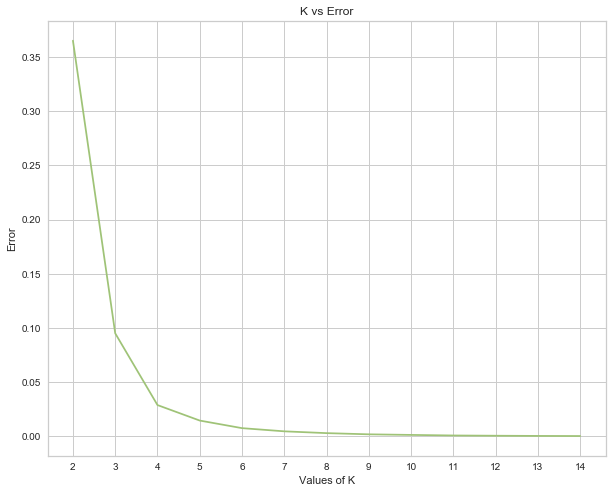

In [100]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 15), y=scores, color='g')
plt.title("K vs Error")
plt.xticks(range(2, 15))
plt.xlabel("Values of K")
plt.ylabel("Error")

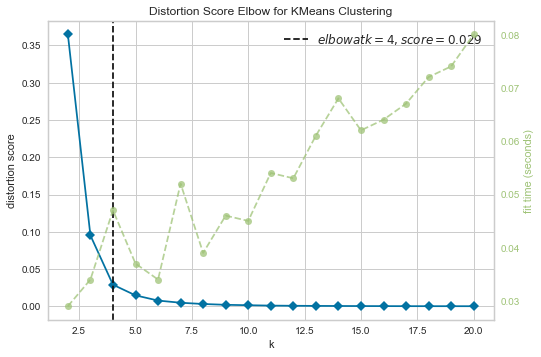

In [101]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [102]:
kclusters = 4

toronto_grouped_clustering = coffee_shop.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [103]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = coffee_shop.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_


to_merged.head()

,Neighborhoods,Coffee Shop,Cluster Labels
0,Agincourt,0.000000,1
1,"Alderwood, Long Branch",0.125000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.100000,0
3,Bayview Village,0.000000,1
4,"Bedford Park, Lawrence Manor East",0.086957,0


In [104]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhoods")

print(to_merged.shape)
to_merged.head()

(2128, 9)


,Neighborhoods,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,0.0,1,43.7942,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
0,Agincourt,0.0,1,43.7942,-79.262029,Twilight,43.791999,-79.258584,Lounge
0,Agincourt,0.0,1,43.7942,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
0,Agincourt,0.0,1,43.7942,-79.262029,Mark's,43.791179,-79.259714,Clothing Store
0,Agincourt,0.0,1,43.7942,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink


In [105]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(2128, 9)


,Neighborhoods,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
31,"Garden District, Ryerson",0.080000,0,43.657162,-79.378937,Salad King,43.657601,-79.381620,Thai Restaurant
75,Stn A PO Boxes,0.103093,0,43.646435,-79.374846,NAMI,43.650853,-79.375887,Japanese Restaurant
75,Stn A PO Boxes,0.103093,0,43.646435,-79.374846,GoodLife Fitness Toronto Street Women's Only,43.650400,-79.376700,Gym
75,Stn A PO Boxes,0.103093,0,43.646435,-79.374846,St. Lawrence Antique Market,43.649615,-79.371747,Antique Shop
75,Stn A PO Boxes,0.103093,0,43.646435,-79.374846,Indigospirit,43.648350,-79.380347,Bookstore
...,...,...,...,...,...,...,...,...,...
35,"Harbourfront East, Union Station, Toronto Islands",0.130000,3,43.640816,-79.381752,Dollarama,43.641765,-79.379589,Discount Store
35,"Harbourfront East, Union Station, Toronto Islands",0.130000,3,43.640816,-79.381752,Starbucks,43.643090,-79.383071,Coffee Shop
35,"Harbourfront East, Union Station, Toronto Islands",0.130000,3,43.640816,-79.381752,Redpath Stage,43.638764,-79.383317,Music Venue
35,"Harbourfront East, Union Station, Toronto Islands",0.130000,3,43.640816,-79.381752,Rainbow Reef,43.642260,-79.385994,Aquarium


In [106]:
to_merged['Venue Category'].value_counts()['Coffee Shop']

179

In [107]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_with_coordinates['Latitude'].mean()
lon_toronto = df_with_coordinates['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


In [108]:
# We see that there are a total of 179 locations with Coffee Shops in Toronto
# We will create a new dataframe with the Neighborhood and Coffee Shops
# create map
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], tiles='Stamen Toner', zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhoods'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [109]:
#How many neighborhoods per cluster do we have?
coffee_shop["Cluster Labels"] = kmeans.labels_
coffee_shop.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhoods,Coffee Shop,Cluster Labels
0,Agincourt,0.000000,1
1,"Alderwood, Long Branch",0.125000,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.100000,0
3,Bayview Village,0.000000,1
4,"Bedford Park, Lawrence Manor East",0.086957,0


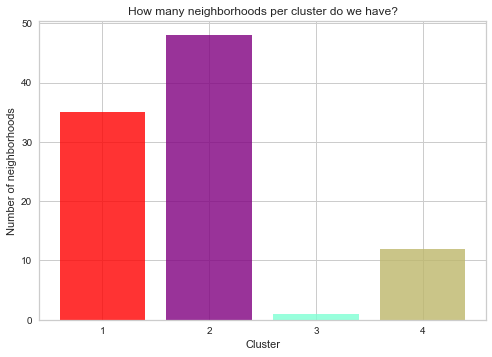

In [119]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = coffee_shop['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of neighborhoods')
plt.xlabel('Cluster')
plt.title('How many neighborhoods per cluster do we have?')

plt.show()

In [111]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighborhood']]
df_new.head()

,Borough,Neighborhood
2,North York,Parkwoods
3,North York,Victoria Village
4,Downtown Toronto,"Regent Park, Harbourfront"
5,North York,"Lawrence Manor, Lawrence Heights"
6,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [112]:
to_merged.rename(columns = {'Neighborhoods':'Neighborhood'}, inplace = True)
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,"Lawrence Manor, Lawrence Heights",0.083333,0,43.718518,-79.464763,Barrymore,43.715890,-79.468188,Furniture / Home Store
1,North York,"Lawrence Manor, Lawrence Heights",0.083333,0,43.718518,-79.464763,Universal Lighting,43.721685,-79.466310,Furniture / Home Store
2,North York,"Lawrence Manor, Lawrence Heights",0.083333,0,43.718518,-79.464763,Party City,43.719418,-79.459317,Miscellaneous Shop
3,North York,"Lawrence Manor, Lawrence Heights",0.083333,0,43.718518,-79.464763,Rinx Real Entertainment Centre,43.717842,-79.462231,Event Space
4,North York,"Lawrence Manor, Lawrence Heights",0.083333,0,43.718518,-79.464763,Bluenotes,43.718846,-79.465906,Clothing Store
...,...,...,...,...,...,...,...,...,...,...
1542,Downtown Toronto,Church and Wellesley,0.075000,0,43.665860,-79.383160,Town Inn Suites,43.669056,-79.382573,Hotel
1543,Downtown Toronto,Church and Wellesley,0.075000,0,43.665860,-79.383160,Joe Fresh,43.661956,-79.380160,Clothing Store
1544,Downtown Toronto,Church and Wellesley,0.075000,0,43.665860,-79.383160,Kokoni Izakaya,43.664181,-79.380258,Japanese Restaurant
1545,Downtown Toronto,Church and Wellesley,0.075000,0,43.665860,-79.383160,Starbucks,43.668071,-79.388367,Coffee Shop


In [114]:
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')
df_cluster2

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,0.0,1,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,Parkwoods,0.0,1,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Scarborough,"Malvern, Rouge",0.0,1,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
3,East York,"Parkview Hill, Woodbine Gardens",0.0,1,43.706397,-79.309937,Rise & Dine Eatery,43.705769,-79.311638,Breakfast Spot
4,East York,"Parkview Hill, Woodbine Gardens",0.0,1,43.706397,-79.309937,TKTO - Toronto Knife Throwing Organization,43.709966,-79.313411,Athletics & Sports
...,...,...,...,...,...,...,...,...,...,...
347,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",0.0,1,43.628841,-79.520999,RONA,43.629393,-79.518320,Hardware Store
348,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",0.0,1,43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
349,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",0.0,1,43.628841,-79.520999,Royal Canadian Legion #210,43.628855,-79.518903,Social Club
350,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",0.0,1,43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


In [115]:
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,Woburn,0.666667,2,43.770992,-79.216917,Tim Hortons,43.770827,-79.223078,Coffee Shop
1,Scarborough,Woburn,0.666667,2,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean Restaurant
2,Scarborough,Woburn,0.666667,2,43.770992,-79.216917,Starbucks,43.770037,-79.221156,Coffee Shop


In [116]:
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4

,Borough,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Victoria Village,0.200000,3,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
1,North York,Victoria Village,0.200000,3,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
2,North York,Victoria Village,0.200000,3,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
3,North York,Victoria Village,0.200000,3,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
4,North York,Victoria Village,0.200000,3,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
...,...,...,...,...,...,...,...,...,...,...
298,Scarborough,"Steeles West, L'Amoreaux West",0.166667,3,43.799525,-79.318389,Price Chopper,43.799445,-79.318563,Grocery Store
299,Scarborough,"Steeles West, L'Amoreaux West",0.166667,3,43.799525,-79.318389,Subway,43.798671,-79.318475,Sandwich Place
300,Scarborough,"Steeles West, L'Amoreaux West",0.166667,3,43.799525,-79.318389,RBC Royal Bank,43.798236,-79.317952,Bank
301,Scarborough,"Steeles West, L'Amoreaux West",0.166667,3,43.799525,-79.318389,Phoenix Restaurant 金鳳餐廳,43.798198,-79.318432,Chinese Restaurant


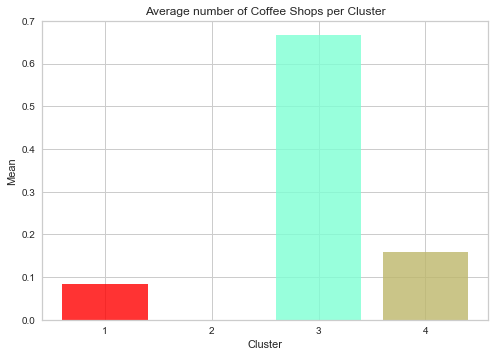

In [118]:
clusters_mean = [df_cluster1['Coffee Shop'].mean(),df_cluster2['Coffee Shop'].mean(),df_cluster3['Coffee Shop'].mean(),
                 df_cluster4['Coffee Shop'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Coffee Shops per Cluster')

plt.show()

## 4 - Results 

We can see that the first two clusters have the largest number of neighbourhoods and the smallest number of competitors simultaneously.

## 5 - Discussion 

According to the results of the study, I would recommend opening a coffee shop first in the second cluster, as there are no competitors at all, and if the business will develop then move to the first cluster, which has competitors, but it is quite promising.

## 6 - Conclusion 

Of course, it is not that simple, a business should be successful, with a good strategy and attractiveness for customers, but the very first step we have already done, found a place to start.